<a href="https://colab.research.google.com/github/VCnavi/trabalhoDespesasSenadores/blob/main/trabalhoDespesaSenadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Imports e arquivos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file = pd.read_csv('/content/drive/MyDrive/DESPESAS_CEAPS-2008-2022.csv', sep=';',low_memory=False)

# Nova seção

In [3]:
# Transformando a coluna "VALOR_REEMBOLSADO" de string para float
file['VALOR_REEMBOLSADO'] = file['VALOR_REEMBOLSADO'].astype(str)
file['VALOR_REEMBOLSADO'] = file['VALOR_REEMBOLSADO'].str.replace(',','.')
file['VALOR_REEMBOLSADO'] = file['VALOR_REEMBOLSADO'].str.replace('\r\n','')
file['VALOR_REEMBOLSADO'] = file['VALOR_REEMBOLSADO'].astype(float)

# Tratando o banco e dados para análise
df = file.drop(['CNPJ_CPF','FORNECEDOR','DOCUMENTO','DATA','DETALHAMENTO','COD_DOCUMENTO'],axis=1)

# Visualização do DataFrame atual
display(df)

,ANO,MES,SENADOR,TIPO_DESPESA,VALOR_REEMBOLSADO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",6000.00
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,1500.00
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,6000.00
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,1000.00
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,2000.00
...,...,...,...,...,...
317958,2008,11,WELLINGTON SALGADO DE OLIVEIRA,"Locomoção, hospedagem, alimentação, combustíve...",6152.97
317959,2008,12,WELLINGTON SALGADO DE OLIVEIRA,"Aluguel de imóveis para escritório político, c...",3818.87
317960,2008,12,WELLINGTON SALGADO DE OLIVEIRA,Aquisição de material de consumo para uso no e...,886.66
317961,2008,12,WELLINGTON SALGADO DE OLIVEIRA,"Contratação de consultorias, assessorias, pesq...",7070.00


In [4]:
# Função para remover itens repetidos das listas criadas a partir das colunas do DataFrame, sem perder a ordem original
def RemoveRepetidos(lista):
    visto = set()
    adicionar_visto = visto.add
    return [x for x in lista if not (x in visto or adicionar_visto(x))]

# Criando listas a partir das colunas do DataFrame
lista_ano = df['ANO'].tolist()
lista_mes = df['MES'].tolist()
lista_senadores = df['SENADOR'].tolist()
lista_tipo_despesa = df['TIPO_DESPESA'].tolist()

[Text(0, 0, 'Aluguel de imóveis para escritório público'),
 Text(0, 1, 'Divulgação de atividade parlamentar'),
 Text(0, 2, 'Passagens aéreas, aquáticas e terrestres nacionais'),
 Text(0, 3, 'Contratações (consultorias, assessorias...)'),
 Text(0, 4, 'Locomoção, hospedagem, alimentação...'),
 Text(0, 5, 'Materiais para uso no escritório público'),
 Text(0, 6, 'Serviços de segurança privada'),
 Text(0, 7, '')]

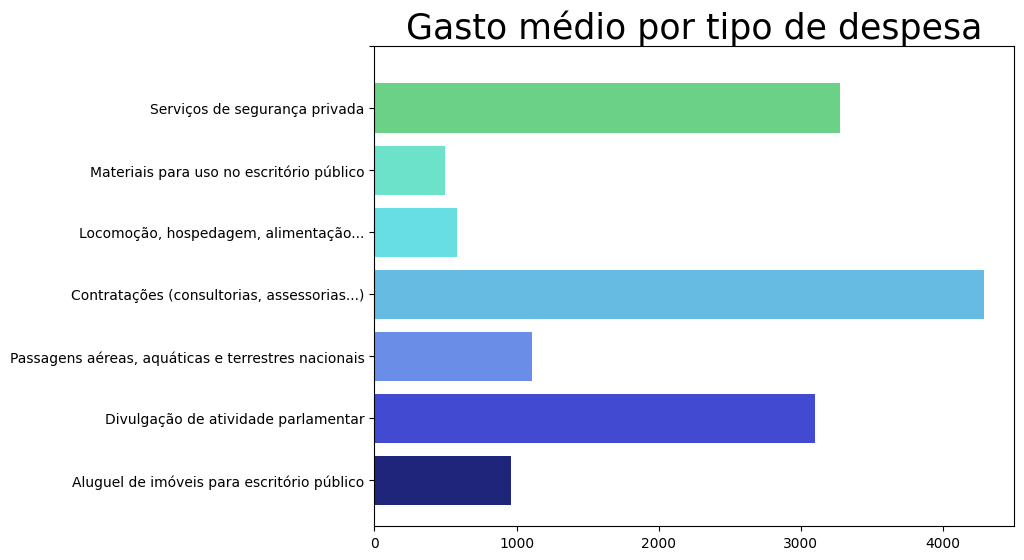

In [8]:
# Listas e valores necessários
x = len(RemoveRepetidos(lista_tipo_despesa))+1
lista_gasto_medio_despesa = []
lista_cores = ["#20257c", "#424ad1", "#6a8ee8", "#66bbe2", "#66dee2", "#6ce2cb", "#6ad187", "#3b7f5b"]
despesas = ['Aluguel de imóveis para escritório público','Divulgação de atividade parlamentar','Passagens aéreas, aquáticas e terrestres nacionais','Contratações (consultorias, assessorias...)',
            'Locomoção, hospedagem, alimentação...','Materiais para uso no escritório público','Serviços de segurança privada',''] # Lista para legenda de gráfico
despesas_colunas = ['Aluguel de imóveis para escritório público','Divulgação de atividade parlamentar','Passagens aéreas, aquáticas e terrestres nacionais','Contratações (consultorias, assessorias...)',
            'Locomoção, hospedagem, alimentação','Materiais para uso no escritório público','Serviços de segurança privada'] # Lista para DataFrame

# Descobrindo os gastos médios por tipo de despesa
for tipo_despesa in RemoveRepetidos(lista_tipo_despesa):
    df_despesa = df[df['TIPO_DESPESA']==tipo_despesa]
    gasto_medio_despesa = (df_despesa['VALOR_REEMBOLSADO'].sum())/len(df_despesa)
    lista_gasto_medio_despesa.append(gasto_medio_despesa)

# Gráfico de gastos médios por tipo de despesa
fig = plt.figure()
eixo = fig.add_axes([0, 0, 1, 1])
eixo.barh(RemoveRepetidos(lista_tipo_despesa),lista_gasto_medio_despesa,color=lista_cores)
eixo.set_title(("Gasto médio por tipo de despesa"), fontsize=25)
eixo.set_yticks(np.arange(x))
eixo.set_yticklabels(despesas)

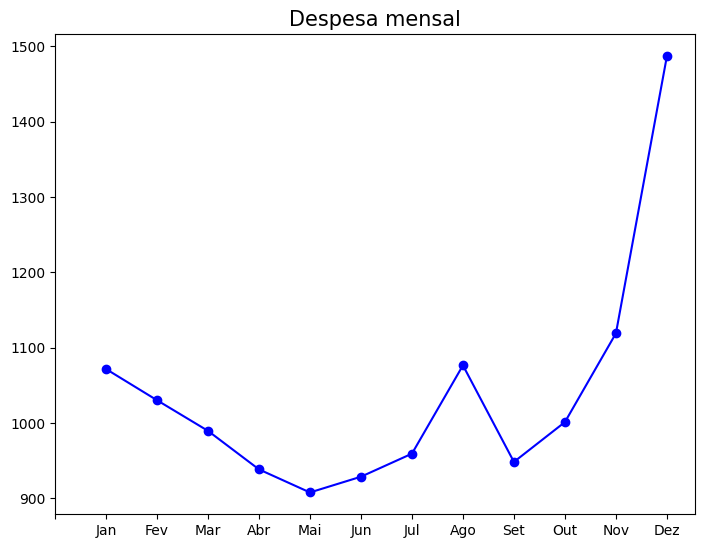

In [5]:
# Listas e valores necessários
x = len(RemoveRepetidos(lista_mes))+1
lista_gasto_medio_mes = []
meses = ['','Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']

# Descobrindo os gastos médios por mês
for mes in RemoveRepetidos(lista_mes):
    df_mes = df[df['MES']==mes]
    gasto_medio_mes = (df_mes['VALOR_REEMBOLSADO'].sum())/len(df_mes)
    lista_gasto_medio_mes.append(gasto_medio_mes)

# Gráfico de gastos médios por mês
fig = plt.figure()
eixo = fig.add_axes([0,0,1,1])
eixo.plot(RemoveRepetidos(lista_mes),lista_gasto_medio_mes, color="blue", marker='o')
eixo.set_title(("Despesa mensal"), fontsize=15)
eixo.set_xticks(np.arange(x))
eixo.set_xticklabels(meses)
plt.show()

Text(0.5, 1.0, 'Gasto médio anual do Senado Federal')

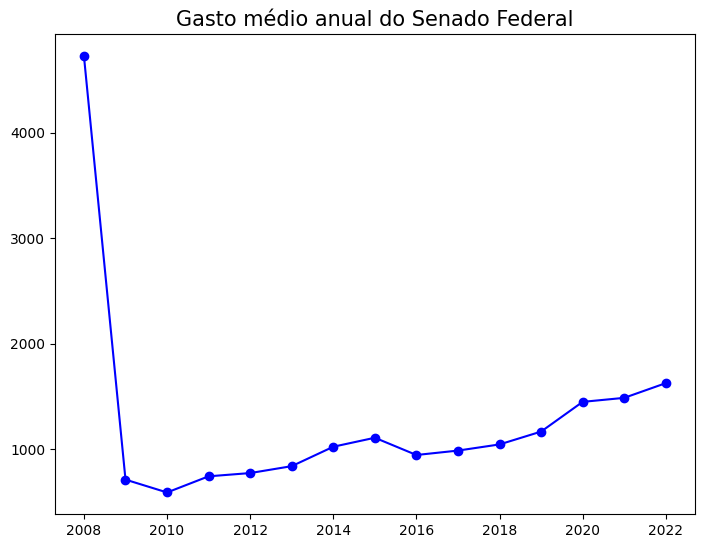

In [9]:
# Lista necessária
lista_gasto_medio_ano = []

# Descobrindo os gastos médios por ano
for ano in RemoveRepetidos(lista_ano):
    df_ano = df[df['ANO']==ano]
    gasto_medio_ano = (df_ano['VALOR_REEMBOLSADO'].sum())/len(df_ano)
    lista_gasto_medio_ano.append(gasto_medio_ano)

# Gráfico de gastos médios por ano
fig = plt.figure()
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(RemoveRepetidos(lista_ano),lista_gasto_medio_ano, color="blue", marker='o')
eixo.set_title(("Gasto médio anual do Senado Federal"), fontsize=15)

In [10]:
# Verificando o motivo de 2008 ter uma média tão alta
for ano in RemoveRepetidos(lista_ano):
  print(ano,':',len(df[df['ANO']==ano]),'registros de gastos')

2022 : 16782 registros de gastos
2021 : 16827 registros de gastos
2020 : 14090 registros de gastos
2019 : 21634 registros de gastos
2018 : 24492 registros de gastos
2017 : 27023 registros de gastos
2016 : 26768 registros de gastos
2015 : 26056 registros de gastos
2014 : 22002 registros de gastos
2013 : 29376 registros de gastos
2012 : 30175 registros de gastos
2011 : 25574 registros de gastos
2010 : 18235 registros de gastos
2009 : 16480 registros de gastos
2008 : 2449 registros de gastos


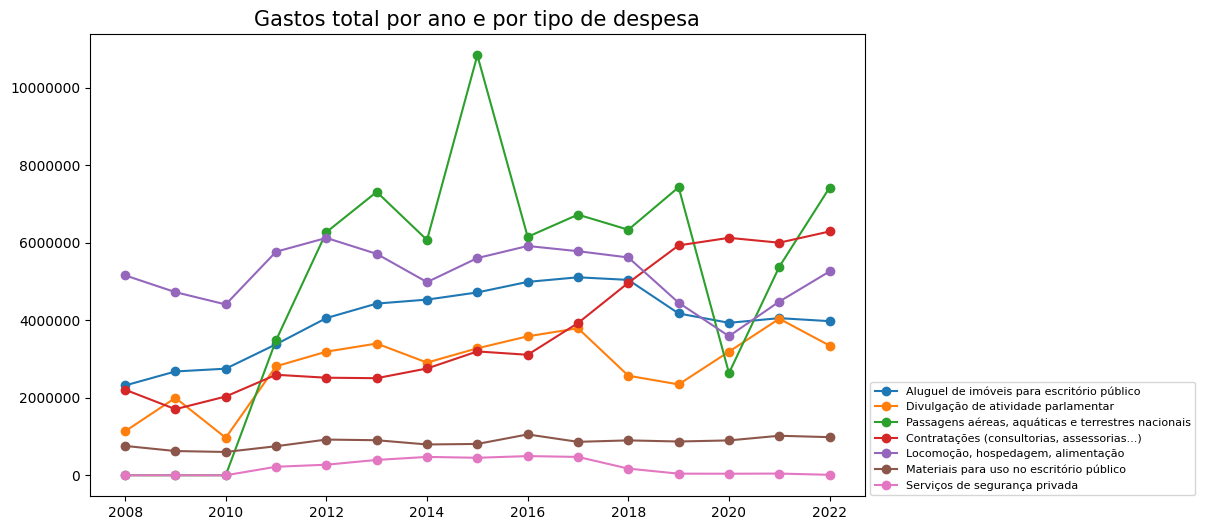

In [49]:
# Criação de um DataFrame com os anos como linhas
df_despesas_ano = pd.DataFrame(index=RemoveRepetidos(lista_ano))

# Completando o DataFrame
for tipo_despesa in RemoveRepetidos(lista_tipo_despesa):
    df_despesa = df[df['TIPO_DESPESA']==tipo_despesa]
    lista_gasto_despesa = []
    for ano in RemoveRepetidos(lista_ano):
      df_despesa_ano = df_despesa[df_despesa['ANO']==ano]
      gasto_despesa = (df_despesa_ano['VALOR_REEMBOLSADO'].sum())
      lista_gasto_despesa.append(gasto_despesa)
    df_despesas_ano[tipo_despesa] = lista_gasto_despesa

df_despesas_ano.columns = despesas_colunas # Mudança no nome das colunas para melhor apresentação da legenda

# Gráfico de gastos por ano com curvas para cada tipo de despesa
df_despesas_ano.plot(figsize=(10,6),marker='o')
plt.legend(bbox_to_anchor=(1,0.125),
           loc='center left',
           fontsize=8)
plt.ticklabel_format(style='plain')
plt.title("Gastos total por ano e por tipo de despesa",fontsize=15)
plt.show()

In [ ]:
# DataFrame com o total de despesas, por tipo e por ano
display(df_despesas_ano)

,"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",Divulgação da atividade parlamentar,"Passagens aéreas, aquáticas e terrestres nacionais","Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar","Locomoção, hospedagem, alimentação, combustíveis e lubrificantes","Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",Serviços de Segurança Privada
2022,3976536.92,3345915.36,7423646.13,6291126.30,5259973.51,983707.82,12222.56
2021,4054218.19,4039199.48,5380211.87,6001073.98,4481746.07,1019921.16,43953.09
2020,3933698.86,3189665.10,2636436.20,6126389.76,3589103.72,899557.98,40071.98
2019,4175159.47,2344364.06,7431967.46,5931522.01,4451860.48,871498.33,41870.59
2018,5041438.25,2568910.24,6335284.94,4966449.41,5620092.84,900312.04,172213.61
2017,5108313.32,3793262.05,6725228.27,3927610.09,5781783.44,862881.86,473761.23
2016,4989820.45,3585465.79,6152462.70,3109181.76,5916160.99,1053998.25,494869.88
2015,4717804.63,3276294.25,10836816.06,3195508.35,5604242.89,808419.05,451465.38
2014,4532709.26,2907771.79,6070659.01,2755498.75,4983816.95,795070.85,473867.51
2013,4430267.96,3398890.90,7311436.37,2505168.71,5712907.60,904412.68,395868.64


In [ ]:
# Lista necessária
lista_gastos_senador = []

# Adicionando à lista os gastos totais de cada senador
for senador in RemoveRepetidos(lista_senadores):
    df_senadores = df[df['SENADOR']==senador]
    gastos_senador = df_senadores['VALOR_REEMBOLSADO'].sum()
    lista_gastos_senador.append(gastos_senador)

# Criando um DataFrame com as colunas dos senadores e seus gastos
df_new = pd.DataFrame(RemoveRepetidos(lista_senadores))
df_new.columns = ['SENADOR']
df_new['GASTOS_TOTAIS'] = lista_gastos_senador

# Separando os senadores com maiores gastos, independente de ano, em um novo DataFrame
df10 = df_new.nlargest(10,'GASTOS_TOTAIS')

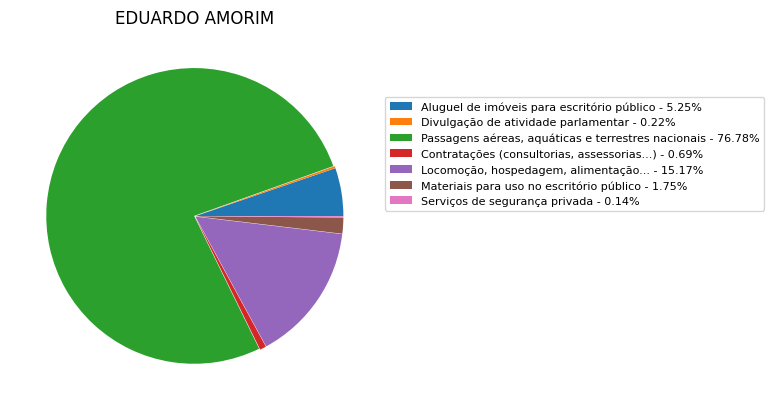

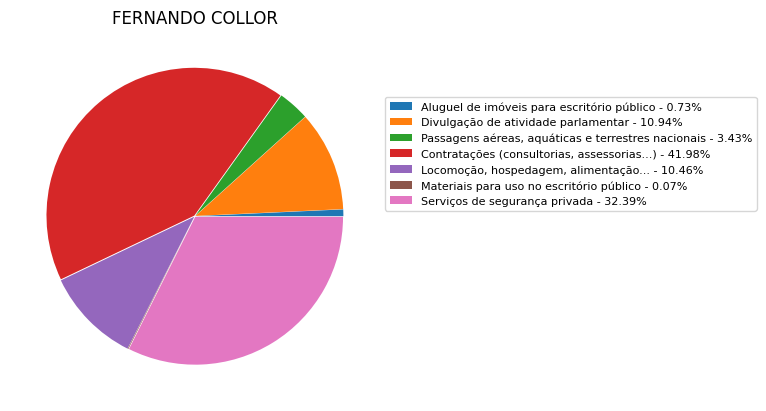

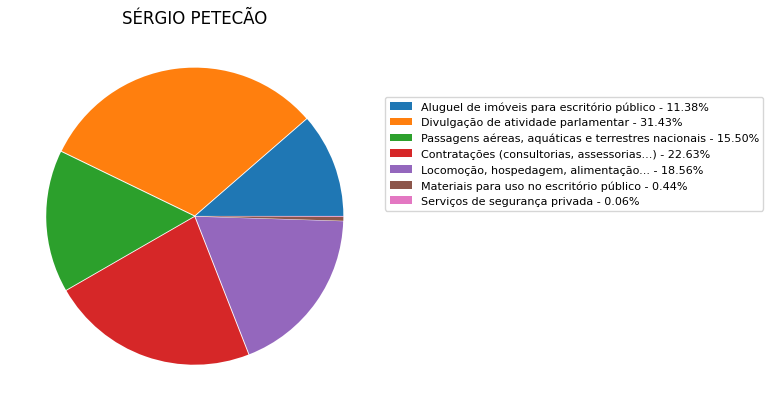

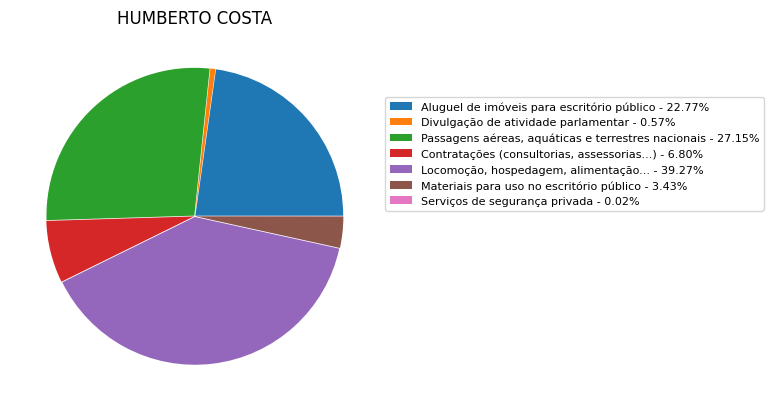

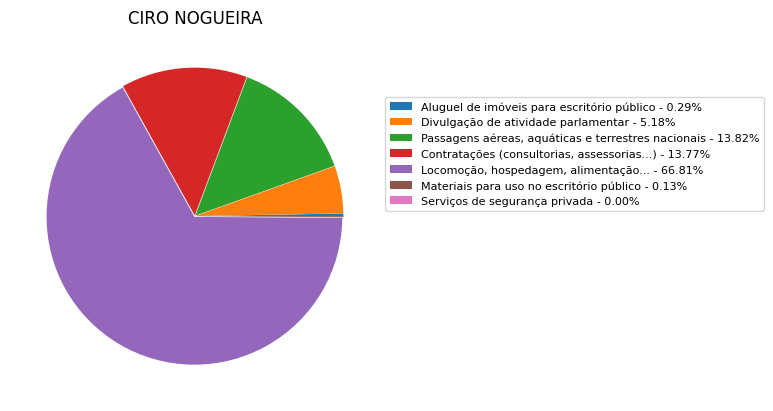

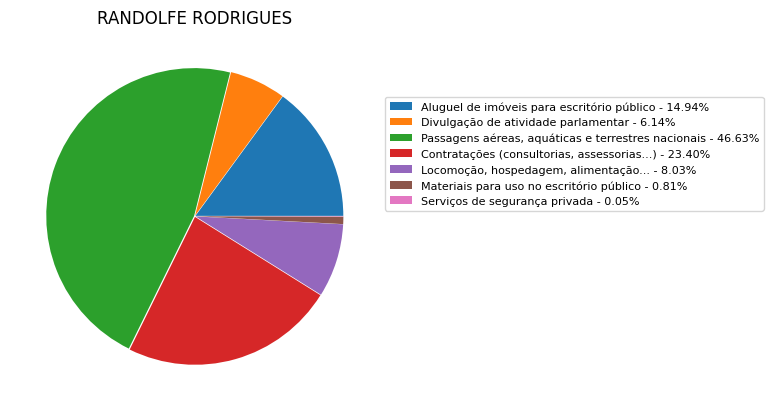

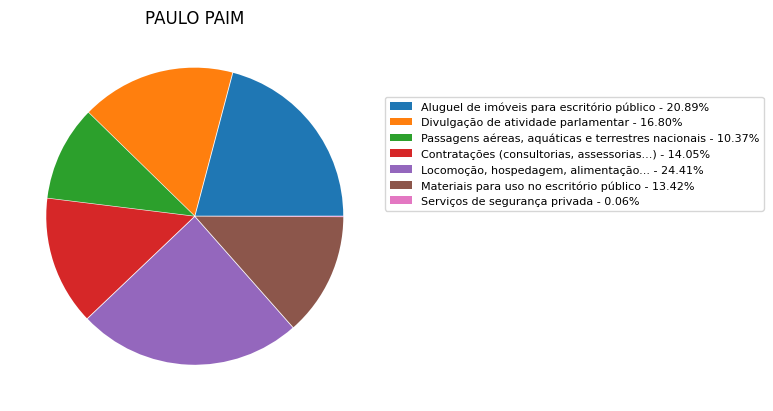

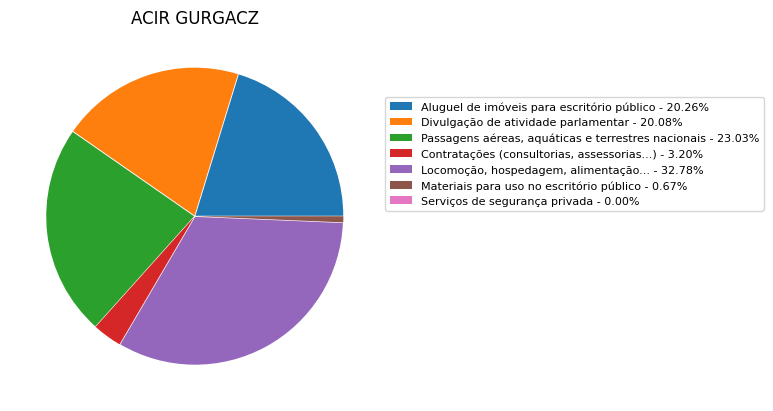

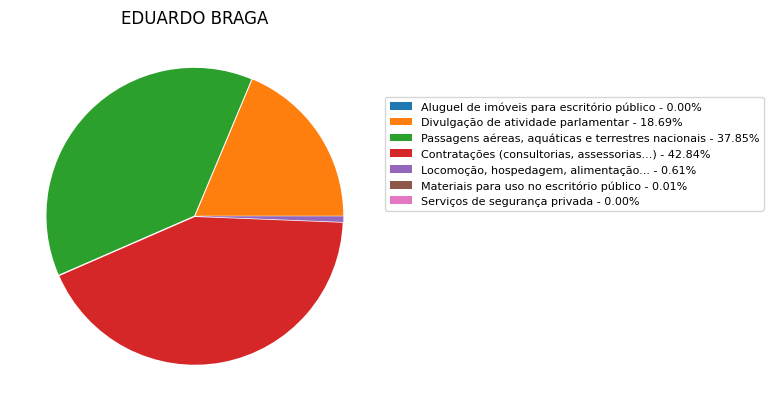

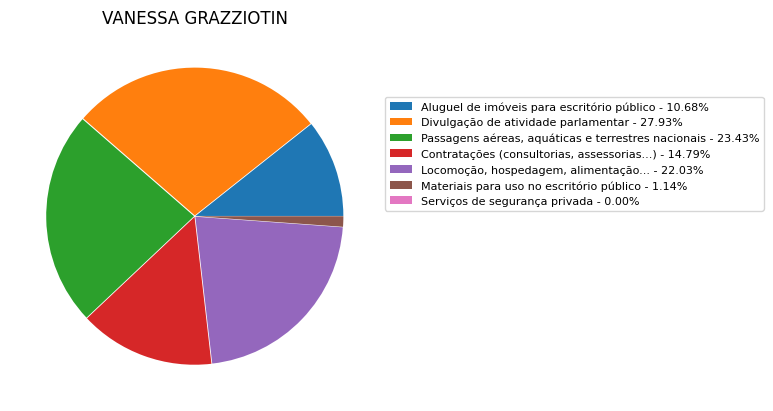

In [ ]:
# Listas necessárias
despesas = ['Aluguel de imóveis para escritório público','Divulgação de atividade parlamentar','Passagens aéreas, aquáticas e terrestres nacionais','Contratações (consultorias, assessorias...)',
            'Locomoção, hospedagem, alimentação...','Materiais para uso no escritório público','Serviços de segurança privada']
destaque = [0.005,0.005,0.005,0.005,0.005,0.005,0.005]
lista_dez_senadores = df10['SENADOR'].tolist()

# Descobrindo a porcentagem de gastos dos senadores para cada tipo de despesa
for senador in lista_dez_senadores:
  gastos_por_despesa = []
  porcentagem_gastos = []
  df_senador = df[df['SENADOR']==senador]

  for tipo_despesa in RemoveRepetidos(lista_tipo_despesa):
    df_senador_despesa = df_senador[df_senador['TIPO_DESPESA']==tipo_despesa]
    gastos_despesa = df_senador_despesa['VALOR_REEMBOLSADO'].sum()
    gastos_por_despesa.append(gastos_despesa)

  # Gráficos de pizza para cada um dos 10 senadores e seus respectivos gastos
  soma = sum(gastos_por_despesa)
  for i in gastos_por_despesa:
    porcentagem_gastos.append(100*i/soma)
  patches, texts = plt.pie(gastos_por_despesa,explode=destaque)
  labels = [('{0} - {1:.2f}%').format(i,j) for i,j in zip(despesas, porcentagem_gastos)]
  plt.title(senador)
  plt.legend(patches, labels, loc='lower left', bbox_to_anchor=(1,0.5),
            fontsize=8)
  plt.show()